**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_numerical -p 8888:8888 -d palmoreck/jupyterlab_numerical:1.1.0
```

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_numerical
```


Documentación de la imagen de docker `palmoreck/jupyterlab_numerical:1.1.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/numerical).

---

Nota generada a partir de [liga](https://www.dropbox.com/s/dfwk0y04ksgfilv/3.5.Aplicaciones_del_algebra_lineal_numerica.pdf?dl=0)

In [1]:
!pip3 install -q --user scikit-learn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import os

In [2]:
cur_directory = os.getcwd()

In [3]:
dir_alg_python = '/algoritmos/Python'

In [4]:
os.chdir(cur_directory + dir_alg_python)

# Componentes principales

En esta nota realizamos una descripción de las componentes principales desde la perspectiva de la descomposición en valores singulares de una matrix $X \in \mathbb{R}^{m \times n}$. El **objetivo** de la nota es la descripción de los problemas de optimización numérica a resolver en componentes principales y el uso de **métodos de descenso** (ver [4.2.Algoritmos_para_UCO](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Algoritmos_para_UCO.ipynb)) para resolver tales problemas, en específico el **método de Newton** (ver [4.2.Metodo_de_Newton_Python](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Metodo_de_Newton_Python.ipynb)). Se comparan los resultados de la **clase de Python** [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) del paquete [scikit-learn](https://scikit-learn.org/stable/index.html) con los obtenidos en la implementación hecha por el prof en [algoritmos/Python](algoritmos/Python), en específico [algoritmos/Python/algorithms_for_uco.py](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/algoritmos/Python/algorithms_for_uco.py) para problemas tipo UCO (Unconstrained Convex Optimization). 

Una referencia didáctica para aprender sobre componentes principales la encuentran en [making-sense-of-principal-component-analysis-eigenvectors-eigenvalues](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues).

Supóngase que en cada columna de $X \in \mathbb{R}^{m \times n}$ se tiene una observación de un **vector aleatorio** (tenemos $n$ vectores aleatorios de mediciones) y sea $X = U \Sigma V^T$ la descomposición en valores singulares de $X$ (ver [3.3.d.SVD](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/III.computo_matricial/3.3.d.SVD.ipynb)). Los vectores **singulares derechos** $v_i$ (columnas de la matriz $V$) son nombrados **ejes o direcciones principales** de $X$ y el vector $z_1 = X v_1 = \sigma u_1$ con $u_1$ vector **singular izquierdo** (primera columna de la matriz $U$) tiene **varianza muestral**:

$$\text{var}(z_1) = \text{var}(X v_1)= \text{var}(\sigma u_1) = \sigma_1^2 \text{var}(u_1) = \sigma_1^2 \left [ \frac{1}{m} \displaystyle \sum_{i=1}^m (u_1(i) - \bar{u}_1)^2 \right ]$$

donde: $u_1(i)$ es la $i$-ésima componente de $u_1$ y $\sigma_1$ es el máximo valor singular de $X$ también denotado como $\sigma_{\text{max}}$.

**Comentarios:**



Si la media de cada columna de $X$ es cero, $X$ se nombra **centrada**, entonces:

* $z_1$ tiene la **máxima varianza muestral** entre todas las combinaciones lineales de las columnas de $X$ pues:

$$\text{var}(z_1) = \frac{\sigma_1^2}{m} \displaystyle \sum_{i=1}^m u_1(i)^2 = \frac{\sigma_1^2}{m} ||u_1||_2^2 = \frac{\sigma_1^2}{m}.$$

* $z_1$ es la **primera componente principal** y el vector $u_1 = \frac{1}{\sigma_1}z_1 = \frac{1}{\sigma_1}Xv_1$ se le nombra **primera componente principal normalizada**. El vector $v_1$ es la **primera dirección principal** de $X$ o también nombrada ***loading***. 




* Calcular el vector con máxima varianza muestral implica resolver el problema de **optimización numérica**:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$

el cual tiene solución cerrada dada por: $\sigma_1^2 = \displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$, $v_1 = \text{argmax}_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$ (primera columna de $V$). 


* La segunda componente principal $z_2$ es aquella que tiene la máxima varianza muestral entre todas las combinaciones lineales de las columnas de $X$ y que es **ortogonal**, o equivalentemente que tenga covarianza igual a cero, con $z_1$. Este problema se escribe como:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$



$$\text{sujeto a: } v^Tv_1 =0$$

con $v_1$ la primera dirección principal de $X$. La solución al problema anterior está dada por: $\sigma_2^2 = \displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$, $v_2 = \text{argmax}_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$ (segunda columna de $V$). 


* La **matriz de correlaciones entre cada componente principal normalizada $u$'s y cada columna de $X$** es:

$$ C = \left (\frac{\sigma_1}{\sqrt{m}} v_1 \quad \frac{\sigma_2}{\sqrt{m}} v_2 \cdots \quad \frac{\sigma_n}{\sqrt{m}} v_n \right) \in \mathbb{R}^{n \times n}$$

pues si $x_1$ es la primer columna de $X$ entonces:



$$
\begin{eqnarray}
\text{cov}(x_1,u_1) = \text{cov} \left ( \displaystyle \sum_{k=1}^n \sigma_k v_k(1) u_k, u_1 \right ) &=& \displaystyle \sum_{k=1}^n \text{cov} ( \sigma_k v_k(1) u_k, u_1 ) \nonumber \\
&=& \displaystyle \sum_{k=1}^n \sigma_k v_k(1) \text{cov} (u_k, u_1) \nonumber \\
&=& \sigma_1 v_1(1) \text{var}(u_1) \nonumber \\
&=& \frac{\sigma_1 v_1(1)}{m} \sum_{i=1}^m u_1(i)^2 \nonumber \\
&=& \frac{\sigma_1 v_1(1)}{m} \nonumber
\end{eqnarray}
$$

Y como $\text{cor}(x_1,u_1) = \frac{\text{cov}(x_1,u_1)}{\sqrt{\text{var}(x_1)} \sqrt{\text{var}(u_1)}}$ se tiene:

$$\text{cor}(x_1,u_1) = \frac{\frac{\sigma_1 v_1(1)}{m}}{1 \cdot \sqrt{\frac{1}{m}}}  = \frac{\sigma_1 v_1(1)}{\sqrt{m}} $$

* **Cociente de varianza explicada** para cada componente es el número:

$$\frac{\sigma_i^2}{\displaystyle \sum_{i=1}^p \sigma_i^2}$$

con $p = \min(m,n)$.

**Obs:** la matriz $\frac{1}{m}X^TX$ es la matriz de **varianzas y covarianzas muestral** la cual **siempre** es una matriz simétrica positiva semidefinida (aún si la $X$ no es centrada). Si $X$ además de ser centrada cumple que la varianza de cada una de sus columnas es $1$, $X$ se nombra **estandarizada**. La matriz $\frac{1}{m}X^TX$ en este caso es la matriz de **correlaciones muestral**. 

## ¿Métodos numéricos para calcular las componentes principales?

Como se describió en la sección anterior, las componentes principales tienen una relación directa con la descomposición en valores singulares de $X$. Así, los métodos numéricos para su cómputo involucran métodos para calcular la SVD como son:

* Algoritmo de Jacobi one sided, ver [3.3.d.SVD](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/III.computo_matricial/3.3.d.SVD.ipynb) y [ex-modulo-3-comp-matricial-svd-czammar](https://github.com/mno-2020-gh-classroom/ex-modulo-3-comp-matricial-svd-czammar) para una implementación.

* [Bidiagonalización](https://en.wikipedia.org/wiki/Bidiagonalization). 

* [Método de la potencia](https://en.wikipedia.org/wiki/Power_iteration) en el que se utiliza el **[cociente de Rayleigh](https://en.wikipedia.org/wiki/Rayleigh_quotient)** para acelerar convergencia. Tal cociente toma la forma $\frac{y^TAy}{y^Ty}$ para $y \neq 0$.

* [Algoritmo QR](https://en.wikipedia.org/wiki/QR_algorithm).

* Métodos de descenso aplicados a problemas de optimización. Recuérdese que en los problemas de optimización convexa sin restricciones (Unconstrained Convex Optimization, ver [4.2.Algoritmos_para_UCO](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Algoritmos_para_UCO.ipynb)) se resuelven problemas de minimización, sin embargo con una modificación sencilla podemos resolver problemas de maximización.


* Para casos particulares como una matriz $X$ *sparse* o rala (gran cantidad de ceros) se utilizan algoritmos como [**Lanczos Golub Kahan bidiagonalization**](http://www.netlib.org/utk/people/JackDongarra/etemplates/node198.html) que forma parte de una amplia clases de métodos nombrados [**Krylov subspace methods**](https://en.wikipedia.org/wiki/Krylov_subspace) y el algoritmo de [**tridiagonalización Lanczos**](https://en.wikipedia.org/wiki/Lanczos_algorithm).

## Método de descenso para cálculo de las componentes principales de $X \in \mathbb{R}^{m \times n}$

En esta sección utilizamos el método de descenso por la dirección de Newton, ver [4.2.Metodo_de_Newton_Python](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Metodo_de_Newton_Python.ipynb), para el cálculo de las componentes principales de la matriz $X \in \mathbb{R}^{m \times n}$ y se comparan los resultados con la clase [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) del paquete [scikit-learn](https://scikit-learn.org/stable/index.html) de Python. 



Construyamos una matriz $X \in \mathbb{R}^{m \times n}$ ejemplo y caculemos sus primeras dos componentes principales vía `scikit-learn`:

In [5]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from utils import compute_error


In [6]:
np.random.seed(2020)
mpoints=200
X = (np.random.rand(2,2)@np.random.normal(0,1,(2,mpoints))).T

In [7]:
X.shape

(200, 2)

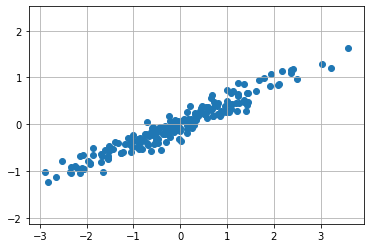

In [8]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.axis('equal');

In [9]:
pca = PCA(n_components=2,svd_solver='full')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

**Direcciones o ejes principales**:

In [10]:
print(pca.components_)

[[ 0.91945871  0.39318658]
 [ 0.39318658 -0.91945871]]


**Varianza explicada por cada componente (primera posición para la primera componente):**

In [11]:
print(pca.explained_variance_ratio_)

[0.99029474 0.00970526]


**Valores singulares de la matriz $X$:**

In [12]:
pca.singular_values_

array([18.68043742,  1.84930434])

**Componentes principales con el método [transform](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) de `scikit-learn.PCA`:**

In [13]:
z = pca.transform(X)

In [14]:
z.shape

(200, 2)

**Primera componente:**

In [15]:
z1 = z[:,0]

In [16]:
z1[0:10]

array([-0.73286192, -0.10931069, -0.5294992 , -1.62049625, -0.55137898,
        0.42135363,  0.07424362, -0.29822525, -1.73357019, -0.56416428])

**Segunda componente:**

In [17]:
z2 = z[:,1]

In [18]:
z2[0:10]

array([ 0.14574216,  0.11652276,  0.12040267,  0.08249224, -0.0437718 ,
        0.03168412, -0.07123458,  0.08183026, -0.02113837, -0.31235302])

### Usemos el método de [SVD](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html#numpy.linalg.svd) del paquete `numpy` para revisar lo que nos devuelve y observar que son iguales sus resultados:

Primero centramos a la $X$:

In [19]:
X_centered = X - X.mean(axis=0)

No olvidemos que el método de `numpy` nos devuelve $V^T$ y no $V$:

In [20]:
u,s,vt = np.linalg.svd(X_centered)

**Los valores singulares están dados por la diagonal de $\Sigma$:**

In [21]:
compute_error(pca.singular_values_,s)

0.0

**Las direcciones principales están dadas por las columnas de $V$ (salvo signos positivos o negativos):**

In [22]:
compute_error(np.abs(pca.components_[0,:]),np.abs(vt.T[:,0]), )

0.0

In [23]:
compute_error(np.abs(pca.components_[1,:]),np.abs(vt.T[:,1]))

0.0

**Las componentes principales están dadas por la multiplicación matricial $XV$ (salvo signos positivos o negativos):**

In [24]:
z_manual = X_centered@(vt.T)

In [25]:
z1_manual = z_manual[:,0]

In [26]:
compute_error(np.abs(z1), np.abs(z1_manual))

0.0

In [27]:
z2_manual = z_manual[:,1]

In [28]:
compute_error(np.abs(z2), np.abs(z2_manual))

0.0

**La varianza explicada está dada por los valores singulares al cuadrado divididos por la suma de éstos al cuadrado:**

In [29]:
compute_error(pca.explained_variance_ratio_[0], s[0]**2/np.sum(s**2))

1.1211036265724342e-16

In [30]:
compute_error(pca.explained_variance_ratio_[1], s[1]**2/np.sum(s**2))

1.7874055033366329e-16

## Problema de optimización

El problema de optimización como se planteó al inicio es de la forma:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$

el cual es equivalente a:

$$\displaystyle \max_{v \in \mathbb{R}^n} v^TX^TX v$$

$$\text{sujeto a}: v^T v = 1$$

pues se puede asociar $\frac{Xv}{v}$ como $X\hat{v}$ y definir la restricción igual a $1$ anterior.

Como **primer enfoque** aproximamos a $v_p$ y $\sigma_p$ con $p=\min(m,n)$.

## Mínimo valor singular

**La función objetivo para el mínimo valor singular elevado al cuadrado, $\sigma_{\text{min}}^2$, es**:

$$\displaystyle \min_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$

que es equivalente a:

$$\displaystyle \min_{v \in \mathbb{R}^n} v^TX^TXv$$


$$\text{sujeto a}: v^T v = 1.$$

cuya solución es $\lambda_\text{min}(X^TX)$ y representa el mínimo eigenvalor de $X^TX$ que es igual a $\sigma_{\text{min}}^2$ (mínimo valor singular de $X$ elevado al cuadrado).

**Obs:** obsérvese que el problema anterior es un problema con **función convexa** y con restricciones (ver el apéndice de definiciones para funciones convexas de [4.1.Optimizacion_numerica_y_machine_learning](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.1.Optimizacion_numerica_y_machine_learning.ipynb)). Sin embargo puede reformularse para preservar la convexidad y no tener restricciones, de esta forma utilizaremos algoritmos para problemas convexos sin restricciones (Unconstrained Convex Optimization) revisados en [4.2.Algoritmos_para_UCO](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Algoritmos_para_UCO.ipynb). El problema convexo sin restricciones es:


$$\displaystyle \min_{v \in \mathbb{R}^n, \lambda \in \mathbb{R}} \frac{1}{2}(v^TX^TXv - \lambda(v^Tv-1)).$$

El problema anterior es equivalente al planteado al inicio pues si $f_o(v, \lambda)$ es la función objetivo, entonces:

$$\nabla f_o(v,\lambda) = 
\left[
\begin{array}{c}
X^TX v - \lambda v \\
-\frac{1}{2}(v^Tv-1)
\end{array}
\right]
$$

y si igualamos a cero esta ecuación se tiene:

$$\nabla f_o(v,\lambda) = 
\left[
\begin{array}{c}
X^TX v - \lambda v \\
-\frac{1}{2}(v^Tv-1)
\end{array}
\right] = 0.
$$

**Obs:** obsérvese que la variable de optimización es el vector $(v, \lambda) \in \mathbb{R}^{n+1}$.

La ecuación anterior implica: $X^TXv = \lambda v$ y también $v^Tv = 1$ por lo que $(v, \lambda)$ es una pareja (eigenvector, eigenvalor) de la matriz $X^TX$, de hecho el eigenvector tiene norma $1$. Como queremos minimizar $f_o(v,\lambda)$ entonces el óptimo será $\lambda_\text{min}(X^TX)$ con $v_{\lambda\text{min}}$ eigenvector asociado. Así, aproximaremos a $\sigma_{\text{min}}^2$.

**Comentario:** La formulación anterior tiene una matriz Hessiana dada por la expresión: 

$$\nabla^2 f_o(v,\lambda) = \left [ 
\begin{array}{cc}
X^TX - \lambda I & -v \\
-v^T & 0
\end{array}
\right ]
$$

la cual involucra a la matriz $X^TX$. **Por este motivo las aproximaciones numéricas que realicemos con este enfoque serán altamente sensibles al número de condición de $X$ y por tanto de $X^TX$.**

### Método de Newton aplicado al problema anterior

In [31]:
import algorithms_for_uco

**Función objetivo (que considera a la matriz $X$ centrada):**

In [32]:
def fo(x):
    v = x[0:(x.size-1)]
    value = x[x.size-1]
    matvec = X_centered@v
    return 1/2*(matvec.dot(matvec)-value*(v.dot(v)-1))

In [33]:
x_ast=np.concatenate((pca.components_[:,1],np.array([pca.singular_values_[1]**2])))

**$x^*$:**

In [34]:
x_ast

array([ 0.39318658, -0.91945871,  3.41992653])

**Punto inicial $x^{(0)}$:**

In [35]:
x_0 = np.array([1,0,5],dtype=float)

In [36]:
x_0

array([1., 0., 5.])

**Valor óptimo $p^*$:**

In [37]:
p_ast=fo(x_ast)

In [38]:
p_ast

1.7099632626913723

**Argumentos para el método de Newton:**


In [39]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50


In [40]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	3.16e+02	3.01e+02	5.41e-01	8.54e+01	---		3.60e+03
1	2.45e+01	3.91e+01	2.43e+00	1.45e+01	1.00e+00	4.81e+02
2	5.46e+00	3.87e+00	1.03e+00	1.31e+00	1.00e+00	6.50e+02
3	1.09e+00	1.64e-01	2.83e-01	4.96e-02	1.00e+00	5.02e+02
4	7.29e-02	4.43e-04	2.04e-02	1.30e-04	1.00e+00	3.57e+02
5	2.17e-04	1.97e-09	6.07e-05	5.77e-10	1.00e+00	3.46e+02
Error of x with respect to x_ast: 6.07e-05
Approximate solution: [ 0.39318841 -0.91946288  3.41971024]


**$x$ aproximada por el método de Newton:**

In [41]:
x

array([ 0.39318841, -0.91946288,  3.41971024])

**$x^*$:**

In [42]:
x_ast

array([ 0.39318658, -0.91945871,  3.41992653])

El valor singular $\sigma_{\text{min}}$ es la raíz cuadrada del eigenvalor mínimo de $X^TX$, $\sqrt{\lambda_{\text{min}}(X^TX)}$, que acabamos de calcular y para este ejemplo está en la entrada $3$ del `array` $x$:

In [43]:
np.sqrt(x[2])

1.8492458564827692

**Error relativo:**

In [44]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

4.5618941080268345e-06

**Tenemos alrededor de $6$ dígitos de precisión a la dirección principal $v_{\text{min}}$.**

In [45]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

6.324336574125975e-05

**Tenemos alrededor de $5$ dígitos de precisión al valor singular $\sigma_{\text{min}}$.**

**Para la componente principal $z_{\text{min}}$ calculamos el error con:**

In [46]:
z = pca.transform(X)

In [47]:
z_approx = X_centered@(x[0:(x.size-1)])

In [48]:
compute_error(np.abs(z[:,1]), np.abs(z_approx))

4.581664961317251e-06

**Tenemos alrededor de $6$ dígitos de precisión el cálculo de la primera componente principal $z_{\text{min}}$.**

**Comentario:** el método anterior es **altamente dependiente al punto inicial**, $x^{(0)}$, compárese con otros puntos iniciales y obsérvese este efecto. 

Por ejemplo para el **punto inicial** utilizamos la siguiente definición basada en el **[cociente de Rayleigh](https://en.wikipedia.org/wiki/Rayleigh_quotient)**:

**Punto inicial $x^{(0)}$:**

In [49]:
vec = np.array([0,1],dtype=float) #vector de norma 1

In [50]:
vec

array([0., 1.])

In [51]:
mv = X_centered@vec


**Cociente de Rayleigh:**

In [52]:
l = mv.dot(mv)/vec.dot(vec) #para este caso como el vector es de norma 1
                            # es equivalente hacer: l = mv.dot(mv)

In [53]:
x_0 = np.concatenate((vec,np.array([l])))

In [54]:
x_0

array([ 0.       ,  1.       , 56.8387374])

**Valor óptimo $p^*$:**

In [55]:
p_ast=fo(x_ast)

In [56]:
p_ast

1.7099632626913723

**Argumentos para el método de Newton:**


In [57]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50


In [58]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	1.25e+02	6.54e+01	1.50e+01	1.56e+01	---		1.92e+04
1	3.43e+01	5.73e+00	3.44e+00	1.75e+00	1.00e+00	3.44e+03
2	1.55e+00	2.79e-02	6.62e-01	8.10e-03	1.00e+00	6.12e+02
3	1.31e-02	-5.37e-06	5.61e-01	1.57e-06	1.00e+00	3.48e+02
Error of x with respect to x_ast: 5.61e-01
Approximate solution: [-0.39311133  0.91925831  3.40729075]


**$x$ aproximada por el método de Newton:**

In [59]:
x

array([-0.39311133,  0.91925831,  3.40729075])

**$x^*$:**

In [60]:
x_ast

array([ 0.39318658, -0.91945871,  3.41992653])

**obsérvese los signos alternados.**

**Error relativo:**

In [61]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

0.00021406197220135572

**Tenemos alrededor de $3$ dígitos de precisión a la dirección principal $v_1$.**

In [62]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

0.0036947494984673826

**Tenemos alrededor de $2$ dígitos de precisión al valor singular $\sigma_{\text{min}}$.**

**Para la componente principal $z_{\text{min}}$ calculamos el error con:**

In [63]:
z_approx = X_centered@(x[0:(x.size-1)])

In [64]:
compute_error(np.abs(z[:,1]), np.abs(z_approx))

0.0002348364474354791

**Tenemos alrededor de $3$ dígitos de precisión el cálculo de la componente principal $z_{\text{min}}$.**

**Otro Punto inicial $x^{(0)}$:**

In [65]:
vec = np.array([10,10],dtype=float) #vector de norma distinta a 1

In [66]:
vec

array([10., 10.])

In [67]:
mv = X_centered@vec


**Definición por cociente de Rayleigh:**

In [68]:
l = mv.dot(mv)/vec.dot(vec)

In [69]:
x_0 = np.concatenate((vec,np.array([l])))

In [70]:
x_0

array([ 10.        ,  10.        , 301.10812121])

**Valor óptimo $p^*$:**

In [71]:
p_ast=fo(x_ast)

In [72]:
p_ast

1.7099632626913723

**Argumentos para el método de Newton:**


In [73]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50


In [74]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	1.69e+03	8.62e+02	8.36e+01	8.70e+01	---		9.25e+01
1	1.25e+03	-7.86e+03	8.70e+01	5.69e+01	2.50e-01	7.05e+01
Error of x with respect to x_ast: 8.70e+01
Approximate solution: [  8.70185566   7.87934434 313.14095405]


**$x$ aproximada por el método de Newton:**

In [75]:
x

array([  8.70185566,   7.87934434, 313.14095405])

**$x^*$:**

In [76]:
x_ast

array([ 0.39318658, -0.91945871,  3.41992653])

**Error relativo:**

In [77]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

10.83854187088827

**Tenemos $10\%$ de error a la dirección principal $v_{\text{min}}$.**

In [78]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

90.56364960734382

**Tenemos $90\%$ de error al valor singular $\sigma_{\text{min}}$.**

**Para la componente principal $z_{\text{min}}$ calculamos el error con:**

In [79]:
z_approx = X_centered@(x[0:(x.size-1)])

In [80]:
compute_error(np.abs(z[:,1]), np.abs(z_approx))

111.53975930589878

**Tenemos $111\%$ de error en el cálculo de la componente principal $z_{\text{min}}$.**

## Máximo valor singular

**La función objetivo para el máximo valor singular elevado al cuadrado, $\sigma_{\text{max}}^2$ es**:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX^TXv}{v^Tv}$$

Por el desarrollo anterior y la relación entre problemas de minimización y maximización es equivalente resolver:

$$\displaystyle \min_{v \in \mathbb{R}^n, \lambda \in \mathbb{R}} - \left ( \frac{1}{2}(v^TX^TXv - \lambda(v^Tv-1)) \right )$$

**Función objetivo:**

In [81]:
def fo_max(x):
    return -fo(x)

In [82]:
x_ast=np.concatenate((pca.components_[:,0],np.array([pca.singular_values_[0]**2])))

**$x^*$:**

In [83]:
x_ast

array([  0.91945871,   0.39318658, 348.9587423 ])

In [84]:
p_ast=fo_max(x_ast)


**Valor óptimo $p^*$:**

In [85]:
p_ast

-174.47937115079444

**Punto inicial $x^{(0)}$:**

In [86]:
x_0 = np.array([1,1,500], dtype=float)

In [87]:
x_0

array([  1.,   1., 500.])

**Argumentos para el método de Newton:**


In [88]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50

In [89]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	3.28e+02	2.10e+02	4.33e-01	7.07e-01	---		4.20e+04
1	5.64e+01	1.07e+01	7.26e-02	3.19e-02	1.00e+00	8.18e+03
2	3.25e+00	5.18e-02	4.47e-03	1.49e-04	1.00e+00	6.63e+02
3	2.82e-02	2.70e-05	7.99e-05	1.16e-08	1.00e+00	3.54e+02
4	1.39e-02	-4.93e-06	3.93e-05	2.94e-08	5.00e-01	3.41e+02
Error of x with respect to x_ast: 3.93e-05
Approximate solution: [  0.91911674   0.39303247 348.97243629]


**$x$ aproximada por el método de Newton:**

In [90]:
x

array([  0.91911674,   0.39303247, 348.97243629])

**$x^*$:**

In [91]:
x_ast

array([  0.91945871,   0.39318658, 348.9587423 ])

El valor singular $\sigma_{\text{max}}$ es la raíz cuadrada del eigenvalor máximo de $X^TX$, $\sqrt{\lambda_{\text{max}}(X^TX)}$, que acabamos de calcular y para este ejemplo está en la entrada $3$ del `array` $x$:

In [92]:
np.sqrt(x[2])

18.68080395204276

**Error relativo:**

In [93]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

0.00037508548476747035

**Tenemos alrededor de $3$ dígitos de precisión a la dirección principal $v_1$.**

In [94]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

3.9242441605274824e-05

**Tenemos alrededor de $5$ dígitos de precisión al valor singular $\sigma_1$.**

**Para la componente principal $z_1$ calculamos el error con:**

In [95]:
z_approx = X_centered@(x[0:(x.size-1)])

In [96]:
compute_error(np.abs(z[:,0]), np.abs(z_approx))

0.00037501618702196854

**Tenemos alrededor de $3$ dígitos de precisión el cálculo de la primera componente principal $z_1$.**

**Comentario:** al igual que en el caso del mínimo valor singular, el método anterior es **altamente dependiente al punto inicial**, $x^{(0)}$, compárese con otros puntos iniciales y obsérvese este efecto. 

**Otro Punto inicial $x^{(0)}$:**

In [97]:
vec = np.array([1,1],dtype=float) #vector de norma distinta a 1

In [98]:
vec

array([1., 1.])

In [99]:
mv = X_centered@vec


**Definición por cociente de Rayleigh:**

In [100]:
l = mv.dot(mv)/vec.dot(vec)

In [101]:
x_0 = np.concatenate((vec,np.array([l])))

In [102]:
x_0

array([  1.        ,   1.        , 301.10812121])

**Valor óptimo $p^*$:**

In [103]:
p_ast=fo(x_ast)

In [104]:
p_ast

174.47937115079444

**Argumentos para el método de Newton:**


In [105]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50


In [106]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	1.69e+02	-6.39e+01	1.37e-01	1.37e-01	---		8.55e+03
Error of x with respect to x_ast: 1.37e-01
Approximate solution: [  1.           1.         301.10812121]


**$x$ aproximada por el método de Newton:**

In [107]:
x

array([  1.        ,   1.        , 301.10812121])

**$x^*$:**

In [108]:
x_ast

array([  0.91945871,   0.39318658, 348.9587423 ])

**Error relativo:**

In [109]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

0.6121351362817103

**Tenemos $61\%$ de error a la dirección principal $v_1$.**

In [110]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

0.137124007209835

**Tenemos $13\%$ de error al valor singular $\sigma_1$.**

**Para la componente principal $z_1$ calculamos el error con:**

In [111]:
z_approx = X_centered@(x[0:(x.size-1)])

In [112]:
compute_error(np.abs(z[:,0]), np.abs(z_approx))

0.31688577886286684

**Tenemos $31\%$ de error para el cálculo de la componente principal $z_1$**.

# Método de *deflation*

Hasta este punto propusimos una matriz con $2$ columnas lo cual ha servido para ilustrar el problema de optimización a resolver y el desempeño del método de Newton para resolverlo. Se vio que la convergencia es muy dependiente del **punto inicial** y la solución del sistema en el método de Newton que involucra a la Hessiana depende del **número de condición** de la misma. En esta sección usamos una matriz de más de $2$ columnas y utilizamos un método de [deflation](https://wiki.math.uwaterloo.ca/statwiki/index.php?title=deflation_Methods_for_Sparse_PCA) clásico para aproximar la segunda componente principal $z_2$.

El método de *deflation* que utilizamos para aproximar la segunda componente principal $z_2$ consiste en aproximar $z_1$ y $\sigma_1$ como en la sección anterior y posteriormente resolver el problema:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX_2^TX_2v}{v^Tv}$$

donde: $X_2 = X_1 - \sigma_1 u_1 v_1^T$ y $X_1 = X$.

La $i+1$-ésima componente principal $z_{i+1}$ consiste en resolver el problema:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{v^TX_{i+1}^TX_{i+1}v}{v^Tv}$$

donde: $X_{i+1} = X_i - \sigma_i u_i v_i^T$ $\forall i=2,3,\dots, p$ con $p = \min(m,n)$.

Tales problemas se resuelven al reescribirlos como:

$$\displaystyle \min_{v \in \mathbb{R}^n, \lambda \in \mathbb{R}} - \left ( \frac{1}{2}(v^TX_i^TX_iv - \lambda(v^Tv-1)) \right )$$

para $i=1,2,\dots,p$.

## Ejemplo

In [113]:
np.random.seed(2020)
mpoints=200
ncols = 3
X = (np.random.rand(ncols,ncols)@np.random.normal(0,1,(ncols,mpoints))).T

In [114]:
pca = PCA(n_components=2,svd_solver='full')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [115]:
X_centered = X - X.mean(axis=0)

### Método de Newton para máximo valor singular

In [116]:
x_ast=np.concatenate((pca.components_[0,:],np.array([pca.singular_values_[0]**2])))

**$x^*:$**

In [117]:
x_ast

array([8.43157183e-01, 2.89334144e-01, 4.53179565e-01, 5.07668739e+02])

**Valor óptimo $p^*:$**

In [118]:
p_ast=fo_max(x_ast)


In [119]:
p_ast

-253.834369353904

**Punto inicial $x^{(0)}$:**

In [120]:
x_0 = np.array([1,0,1,400], dtype=float)

In [121]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50


In [122]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	2.49e+02	8.73e+01	2.12e-01	8.41e-02	---		2.74e+04
1	7.41e+01	9.44e+00	1.06e-02	1.80e-02	1.00e+00	1.89e+03
2	1.10e+00	-4.42e-02	1.54e-03	9.03e-05	1.00e+00	6.91e+02
Error of x with respect to x_ast: 1.54e-03
Approximate solution: [8.67811089e-01 2.96955349e-01 4.67847927e-01 5.06886795e+02]


**$x$ aproximada por el método de Newton:**

In [123]:
x

array([8.67811089e-01, 2.96955349e-01, 4.67847927e-01, 5.06886795e+02])

**$x^*$:**

In [124]:
x_ast

array([8.43157183e-01, 2.89334144e-01, 4.53179565e-01, 5.07668739e+02])

**Error relativo:**

In [125]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

0.029682632713874817

**Tenemos alrededor de $2$ dígitos de precisión a la dirección principal $v_1$.**

In [126]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

0.0015402627623579644

**Tenemos alrededor de $2$ dígitos de precisión al valor singular $\sigma_{1}$.**

**Para la componente principal $z_1$ calculamos el error con:**

In [127]:
z = pca.transform(X)

In [128]:
z_approx = X_centered@(x[0:(x.size-1)])

In [129]:
compute_error(np.abs(z[:,0]), np.abs(z_approx))

0.02964321261074488

**Tenemos alrededor de $2$ dígitos de precisión para la primera componente principal $z_1$**.

### Aplicamos el método de Deflation

In [130]:
X_def = X-np.outer(z_approx,x[0:(x.size-1)])

**Centramos:**

In [131]:
X_centered = X_def - X_def.mean(axis=0)

In [132]:
x_ast=np.concatenate((pca.components_[1,:],np.array([pca.singular_values_[1]**2])))

**$x^*$:**

In [133]:
x_ast

array([-4.56631429e-01, -5.96368650e-02,  8.87654878e-01,  6.32717762e+01])

**Valor óptimo $p^*$:**

In [134]:
p_ast

-253.834369353904

**Punto inicial $x^{(0)}$:**

In [135]:
x_0 = np.array([-1,0,0,60], dtype=float)

In [136]:
x_0

array([-1.,  0.,  0., 60.])

In [137]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_max(x_ast)


In [138]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                       tol_backtracking, x_ast, p_ast, maxiter)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	5.18e+01	6.53e+01	5.43e-02	7.69e-01	---		1.20e+03
1	2.27e+01	1.45e+01	1.06e-01	2.63e-01	5.00e-01	1.90e+02
2	2.57e+00	6.46e-01	2.99e-02	1.09e-02	1.00e+00	1.17e+02
3	2.45e-01	5.13e-03	3.82e-03	8.42e-05	1.00e+00	7.04e+01
4	2.95e-03	4.23e-06	5.19e-05	4.33e-07	1.00e+00	6.26e+01
5	1.45e-05	6.37e-12	1.62e-05	5.00e-07	1.00e+00	6.26e+01
Error of x with respect to x_ast: 1.62e-05
Approximate solution: [-4.57233636e-01 -5.98527287e-02  8.87329172e-01  6.32725109e+01]


**$x$ aproximada por el método de Newton:**

In [139]:
x

array([-4.57233636e-01, -5.98527287e-02,  8.87329172e-01,  6.32725109e+01])

**$x^*$:**

In [140]:
x_ast

array([-4.56631429e-01, -5.96368650e-02,  8.87654878e-01,  6.32717762e+01])

**Error relativo:**

In [141]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

0.0007178680037215867

**Tenemos alrededor de $3$ dígitos de precisión a la dirección principal $v_2$.**

In [142]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

1.1612605806848422e-05

**Tenemos alrededor de $5$ dígitos de precisión al valor singular $\sigma_{2}$.**

**Para la componente principal $z_2$ calculamos el error con:**

In [143]:
z_approx = X_centered@(x[0:(x.size-1)])

In [144]:
compute_error(np.abs(z[:,1]), np.abs(z_approx))

0.0036931117614051987

**Tenemos alrededor de $2$ dígitos de precisión para la segunda componente principal $z_2$**.

## Más columnas

**Para este caso utilizamos el gradiente y la Hessiana de forma simbólica en lugar de las aproximaciones por diferencias finitas a la primera y segunda derivada.**

**Gradiente:**

In [145]:
def gfo(x):
    v = x[0:(x.size-1)]
    value = x[x.size-1]
    m,n=X_centered.shape
    first_block = cov@v-value*v
    second_block = -1/2*(v.dot(v)-1)
    return np.concatenate((first_block,np.array([second_block])))

In [146]:
def gfo_max(x):
    return -gfo(x)

**Hessiana:**

In [147]:
def Hfo(x):
    v = x[0:(x.size-1)]
    value = x[x.size-1]
    m,n=X_centered.shape
    first_block = cov - value*np.eye(v.size)
    second_block = -v
    fs_block = np.column_stack((first_block, second_block))
    third_block = -v.T
    fourth_block = np.zeros(1)
    tf_block = np.row_stack((third_block.reshape(1,v.size).T, fourth_block)).reshape(1,v.size+1)[0]
    return np.row_stack((fs_block, tf_block))

In [148]:
def Hfo_max(x):
    return -Hfo(x)

In [149]:
np.random.seed(1)
mpoints=100
ncols=20
X = (np.random.rand(ncols,ncols)@np.random.normal(0,1,(ncols,mpoints))).T

In [150]:
pca = PCA(n_components=2,svd_solver='full')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [151]:
X_centered = X - X.mean(axis=0)

In [152]:
m,n = X.shape

**Matriz de covarianzas:**

In [153]:
cov = (m-1)*np.cov(X_centered, rowvar=False)

### Método de Newton para máximo valor singular

In [154]:
x_ast=np.concatenate((pca.components_[0,:],np.array([pca.singular_values_[0]**2])))

**$x^*:$**

In [155]:
x_ast[0:10]

array([-0.13159443, -0.21766135, -0.20552217, -0.21715208, -0.26924412,
       -0.2390722 , -0.2186774 , -0.19404237, -0.19741352, -0.22571098])

In [156]:
x_ast.shape

(21,)

In [157]:
x_ast[x_ast.size-1]

11016.929766689937

**Valor óptimo $p^*:$**

In [158]:
p_ast=fo_max(x_ast)


In [159]:
p_ast

-5508.464883344969

**Punto inicial $x^{(0)}$:**

In [160]:
x_0 = np.zeros(ncols+1)

In [161]:
x_0[0]=1

In [162]:
x_0[x_0.size-1] = 11000

In [163]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50


In [164]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                                          tol_backtracking, x_ast, p_ast, maxiter,
                                                                          gfo_max,
                                                                          Hfo_max)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	1.08e+04	1.18e+04	1.54e-03	9.72e-01	---		1.18e+07
1	8.04e+03	6.44e+03	2.28e-02	6.09e-01	2.50e-01	5.93e+05
2	1.70e+02	8.07e+01	7.81e-03	8.39e-03	1.00e+00	4.64e+05
3	2.36e+01	2.93e+00	2.02e-03	2.74e-04	1.00e+00	2.15e+05
4	1.33e+00	5.43e-03	2.18e-04	4.94e-07	1.00e+00	2.05e+04
5	2.71e-03	1.13e-08	1.82e-04	1.03e-12	1.00e+00	1.10e+04
Error of x with respect to x_ast: 1.82e-04
Approximate solution: [1.31594709e-01 2.17661801e-01 2.05522598e-01 2.17152530e-01
 2.69244687e-01 2.39072695e-01 2.18677857e-01 1.94042778e-01
 1.97413932e-01 2.25711447e-01 2.30237075e-01 2.14230059e-01
 2.25448044e-01 2.42516798e-01 2.57257083e-01 2.28687264e-01
 2.10776141e-01 2.96689152e-01 1.94489880e-01 2.08747085e-01
 1.10169325e+04]


**$x$ aproximada por el método de Newton:**

In [165]:
x[0:10]

array([0.13159471, 0.2176618 , 0.2055226 , 0.21715253, 0.26924469,
       0.23907269, 0.21867786, 0.19404278, 0.19741393, 0.22571145])

**$x^*$:**

In [166]:
x_ast[0:10]

array([-0.13159443, -0.21766135, -0.20552217, -0.21715208, -0.26924412,
       -0.2390722 , -0.2186774 , -0.19404237, -0.19741352, -0.22571098])

**Error relativo:**

In [167]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

2.087779410177175e-06

**Tenemos alrededor de $6$ dígitos de precisión a la dirección principal $v_1$.**

In [168]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

2.4577357064218877e-07

**Tenemos alrededor de $7$ dígitos de precisión al valor singular $\sigma_1$.**

**Para la componente principal $z_1$ calculamos el error con:**

In [169]:
z = pca.transform(X)

In [170]:
z_approx = X_centered@(x[0:(x.size-1)])

In [171]:
compute_error(np.abs(z[:,0]), np.abs(z_approx))

2.0877794100886935e-06

**Tenemos alrededor de $6$ dígitos de precisión para la primera componente principal $z_1$**.

### Aplicamos el método de Deflation

In [172]:
X_def = X-np.outer(z_approx,x[0:(x.size-1)])

**Centramos:**

In [173]:
X_centered = X_def - X_def.mean(axis=0)

**Matriz de covarianzas:**

In [174]:
cov = (m-1)*np.cov(X_centered, rowvar=False)

In [175]:
x_ast=np.concatenate((pca.components_[1,:],np.array([pca.singular_values_[1]**2])))

**$x^*$:**

In [176]:
x_ast[0:10]

array([-0.10517685, -0.06015694,  0.34819271,  0.01373999,  0.02790862,
       -0.45245898,  0.20360786,  0.00619914,  0.02715925, -0.4370721 ])

**Valor óptimo $p^*$:**

In [177]:
p_ast

-5508.464883344969

In [178]:
x_ast[x_ast.size-1]

767.0633968453919

**Punto inicial $x^{(0)}$:**

In [179]:
x_0 = np.zeros(ncols+1)

In [180]:
x_0[vec.size-1]=1

In [181]:
x_0[x_0.size-1] = 767

In [182]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_max(x_ast)


In [183]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                                          tol_backtracking, x_ast, p_ast, maxiter,
                                                                          gfo_max,
                                                                          Hfo_max)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	6.14e+02	6.10e+02	1.90e-03	7.72e-01	---		2.19e+04
1	4.60e+02	3.88e+02	9.12e-03	5.32e-01	2.50e-01	2.91e+02
2	5.60e+00	7.34e+00	5.11e-03	1.20e-02	1.00e+00	5.01e+02
3	1.25e+00	6.80e-01	3.30e-03	1.01e-03	1.00e+00	7.46e+02
4	2.19e-01	2.17e-02	2.69e-03	2.90e-05	1.00e+00	8.01e+02
5	1.01e-02	2.75e-05	2.61e-03	3.59e-08	1.00e+00	7.70e+02
6	1.38e-05	2.60e-11	2.61e-03	3.39e-14	1.00e+00	7.67e+02
Error of x with respect to x_ast: 2.61e-03
Approximate solution: [ 1.05176947e-01  6.01569963e-02 -3.48193034e-01 -1.37400042e-02
 -2.79086500e-02  4.52459411e-01 -2.03608052e-01 -6.19914275e-03
 -2.71592720e-02  4.37072515e-01  1.35726641e-04  1.30357065e-01
  2.78912492e-01 -8.35296537e-03  5.24098666e-04 -3.96376333e-01
  1.36499226e-01 -3.89938924e-01 -9.14181022e-03 -4.89202270e-02
  7.67063411e+02]


**$x$ aproximada por el método de Newton:**

In [184]:
x[0:10]

array([ 0.10517695,  0.060157  , -0.34819303, -0.01374   , -0.02790865,
        0.45245941, -0.20360805, -0.00619914, -0.02715927,  0.43707252])

**$x^*$:**

In [185]:
x_ast[0:10]

array([-0.10517685, -0.06015694,  0.34819271,  0.01373999,  0.02790862,
       -0.45245898,  0.20360786,  0.00619914,  0.02715925, -0.4370721 ])

**Error relativo:**

In [186]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

9.449417239717334e-07

**Tenemos alrededor de $7$ dígitos de precisión a la dirección principal $v_2$.**

In [187]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

1.790576023498009e-08

**Tenemos alrededor de $8$ dígitos de precisión al valor singular $\sigma_{2}$.**

**Para la componente principal $z_2$ calculamos el error con:**

In [188]:
z_approx = X_centered@(x[0:(x.size-1)])

In [189]:
compute_error(np.abs(z[:,1]), np.abs(z_approx))

9.449417240183714e-07

**Tenemos alrededor de $7$ dígitos de precisión para la segunda componente principal $z_2$**.

## Datos de Irene Ramos, github: [iramosp/tesis-paisajes](https://github.com/iramosp/tesis-paisajes/blob/master/Tipologia_manejo_agricola.ipynb)

In [193]:
# leer los datos
datos = pd.read_csv(cur_directory+ '/datos/censo.csv', encoding ='ISO-8859-1')
datos = datos.set_index('Clave')

In [194]:
datos[['Entidad y municipio', 'Entidad', '% Temporal', '% Mecánica', 
       '% labor agricola', '% bosque', '% Herbicidas químicos', 
       '% Insecticidas químicos']].head()

,Entidad y municipio,Entidad,% Temporal,% Mecánica,% labor agricola,% bosque,% Herbicidas químicos,% Insecticidas químicos
Clave,,,,,,,,
01_001,AGUASCALIENTES,AGUASCALIENTES,75.123727,83.413297,52.676031,0.044765,20.376084,6.765960
01_002,ASIENTOS,AGUASCALIENTES,77.939970,79.576299,80.546052,0.101570,12.520469,4.501609
01_003,CALVILLO,AGUASCALIENTES,59.930021,38.037634,24.321383,0.650017,14.951300,7.547488
01_004,COSÍO,AGUASCALIENTES,47.511173,91.229743,77.868016,0.025051,19.282536,7.912925
01_005,JESÚS MARÍA,AGUASCALIENTES,72.548701,80.868167,33.136668,0.362998,33.637145,7.005523


In [195]:
pca = PCA(n_components=2,svd_solver='full')


In [196]:
datos_subset = datos[['% Temporal', '% Mecánica', 
                      '% labor agricola', '% bosque',
                      '% Herbicidas químicos', 
                      '% Insecticidas químicos']]

In [197]:
datos_subset.head()

,% Temporal,% Mecánica,% labor agricola,% bosque,% Herbicidas químicos,% Insecticidas químicos
Clave,,,,,,
01_001,75.123727,83.413297,52.676031,0.044765,20.376084,6.765960
01_002,77.939970,79.576299,80.546052,0.101570,12.520469,4.501609
01_003,59.930021,38.037634,24.321383,0.650017,14.951300,7.547488
01_004,47.511173,91.229743,77.868016,0.025051,19.282536,7.912925
01_005,72.548701,80.868167,33.136668,0.362998,33.637145,7.005523


In [198]:
pca.fit(datos_subset)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [199]:
pca.components_

array([[-0.38839897,  0.78112651, -0.26819812, -0.0024218 ,  0.32505806,
         0.2477676 ],
       [-0.02828738,  0.07442689,  0.90071451, -0.05770841,  0.35728011,
         0.22670354]])

In [200]:
X = datos_subset.to_numpy()

**Centramos:**

In [201]:
X_centered = (X - X.mean(axis=0))

In [202]:
m,n = X.shape

**Matriz de covarianzas:**

In [203]:
cov = (m-1)*np.cov(X_centered, rowvar=False)

**$x^*$:**

In [204]:
x_ast=np.concatenate((pca.components_[0,:],np.array([pca.singular_values_[0]**2])))

In [205]:
x_ast

array([-3.88398968e-01,  7.81126508e-01, -2.68198117e-01, -2.42179569e-03,
        3.25058056e-01,  2.47767603e-01,  3.23139898e+06])

**$p^*$:**

In [206]:
p_ast=fo_max(x_ast)

In [207]:
p_ast

-1615699.4909229008

**Punto inicial $x^{(0)}$:**

In [208]:
x_0 = np.zeros(n+1)

In [209]:
x_0[0]=1

In [210]:
x_0[x_0.size-1]=3e6

In [211]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50

In [212]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                                          tol_backtracking, x_ast, p_ast, maxiter,
                                                                          gfo_max,
                                                                          Hfo_max)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	2.06e+06	5.56e+06	7.16e-02	6.46e-01	---		1.07e+13
1	1.68e+06	9.94e+05	7.16e-02	3.32e-01	1.25e-01	6.06e+11
2	1.33e+05	5.48e+03	1.85e-03	1.66e-03	1.00e+00	1.42e+10
3	7.66e+02	-1.48e+01	2.18e-04	4.59e-06	1.00e+00	2.15e+09
Error of x with respect to x_ast: 2.18e-04
Approximate solution: [ 3.92376689e-01 -7.89381263e-01  2.71034729e-01  2.44457497e-03
 -3.28494386e-01 -2.50381468e-01  3.23069560e+06]


**$x$ aproximada por el método de Newton:**

In [213]:
x[0:10]

array([ 3.92376689e-01, -7.89381263e-01,  2.71034729e-01,  2.44457497e-03,
       -3.28494386e-01, -2.50381468e-01,  3.23069560e+06])

**$x^*$:**

In [214]:
x_ast[0:10]

array([-3.88398968e-01,  7.81126508e-01, -2.68198117e-01, -2.42179569e-03,
        3.25058056e-01,  2.47767603e-01,  3.23139898e+06])

**Error relativo:**

In [215]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

0.01051906717996821

**Tenemos alrededor de $2$ dígitos de precisión a la dirección principal $v_1$.**

In [216]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

0.000217672454599147

**Tenemos alrededor de $3$ dígitos de precisión al valor singular $\sigma_{1}$.**

**Para la componente principal $z_1$ calculamos el error con:**

In [217]:
z = pca.transform(X)

In [218]:
z_approx = X_centered@(x[0:(x.size-1)])

In [219]:
compute_error(np.abs(z[:,0]), np.abs(z_approx))

0.010518574274396326

**Tenemos alrededor de $2$ dígitos de precisión para la primera componente principal $z_1$**.

### Aplicamos el método de Deflation

In [220]:
X_def = X-np.outer(z_approx,x[0:(x.size-1)])

**Centramos:**

In [221]:
X_centered = X_def - X_def.mean(axis=0)

**Matriz de covarianzas:**

In [222]:
cov = (m-1)*np.cov(X_centered, rowvar=False)

In [223]:
x_ast=np.concatenate((pca.components_[1,:],np.array([pca.singular_values_[1]**2])))

**$x^*$:**

In [224]:
x_ast[0:10]

array([-2.82873817e-02,  7.44268899e-02,  9.00714510e-01, -5.77084114e-02,
        3.57280109e-01,  2.26703542e-01,  1.62206510e+06])

**Valor óptimo $p^*$:**

In [225]:
p_ast

-1615699.4909229008

In [226]:
x_ast[x_ast.size-1]

1622065.100229333

**Punto inicial $x^{(0)}$:**

In [227]:
x_0 = np.zeros(n+1)

In [228]:
x_0[x_0.size-2]=1

In [229]:
x_0[x_0.size-1] = 1600000

In [230]:
tol=1e-8
tol_backtracking=1e-14
maxiter=50
p_ast=fo_max(x_ast)


In [231]:
[x,total_of_iterations,Err_plot,x_plot]=algorithms_for_uco.Newtons_method(fo_max, x_0,tol, 
                                                                          tol_backtracking, x_ast, p_ast, maxiter,
                                                                          gfo_max,
                                                                          Hfo_max)

I	Normgf 	Newton Decrement	Error x_ast	Error p_ast	line search	CondHf
0	1.33e+06	1.90e+06	1.36e-02	7.93e-01	---		1.02e+12
1	9.72e+05	7.87e+05	8.45e-02	5.38e-01	2.50e-01	7.32e+10
2	7.52e+04	2.46e+04	2.51e-02	1.66e-02	1.00e+00	4.21e+10
3	8.02e+03	4.47e+02	4.74e-03	2.80e-04	1.00e+00	1.18e+10
4	2.14e+02	1.75e-01	1.32e-04	1.08e-07	1.00e+00	3.46e+08
5	8.73e-02	1.46e-08	5.39e-08	3.92e-11	1.00e+00	1.69e+06
Error of x with respect to x_ast: 5.39e-08
Approximate solution: [-2.82898175e-02  7.44317860e-02  9.00712906e-01 -5.77084313e-02
  3.57282175e-01  2.26705114e-01  1.62206519e+06]


**$x$ aproximada por el método de Newton:**

In [232]:
x[0:10]

array([-2.82898175e-02,  7.44317860e-02,  9.00712906e-01, -5.77084313e-02,
        3.57282175e-01,  2.26705114e-01,  1.62206519e+06])

**$x^*$:**

In [233]:
x_ast[0:10]

array([-2.82873817e-02,  7.44268899e-02,  9.00714510e-01, -5.77084114e-02,
        3.57280109e-01,  2.26703542e-01,  1.62206510e+06])

**Error relativo:**

In [234]:
compute_error(np.abs(x_ast[0:(x_ast.size-1)]),np.abs(x[0:(x.size-1)]))

6.262570580298548e-06

**Tenemos alrededor de $6$ dígitos de precisión a la dirección principal $v_2$.**

In [235]:
compute_error(x_ast[x_ast.size-1],x[x.size-1])

5.3869140491686594e-08

**Tenemos alrededor de $8$ dígitos de precisión al valor singular $\sigma_{2}$.**

**Para la componente principal $z_2$ calculamos el error con:**

In [236]:
z_approx = X_centered@(x[0:(x.size-1)])

In [237]:
compute_error(np.abs(z[:,1]), np.abs(z_approx))

9.032257712759627e-06

**Tenemos alrededor de $6$ dígitos de precisión a la componente principal $z_2$.**

**Referencias:**

* S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

* [3.5.Aplicaciones_del_algebra_lineal_numerica](https://www.dropbox.com/s/dfwk0y04ksgfilv/3.5.Aplicaciones_del_algebra_lineal_numerica.pdf?dl=0)